In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# create 200 data points
start_point, end_point, points_number = -0.5, 0.5, 200
x_data = np.linspace(start_point, end_point, points_number)[:, np.newaxis]

mu, sigma = 0, 0.02
noise = np.random.normal(mu, sigma, x_data.shape)

y_data = np.square(x_data) + noise
print (x_data.shape)

(200, 1)


In [56]:
# input and output of neural net
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

input_neural_number, hidden_neural_number, output_neural_number = 1, 10, 1

# weights
weights_l1 = tf.Variable(tf.random_normal([input_neural_number, hidden_neural_number]))
b_l1 = tf.Variable(tf.zeros([input_neural_number, hidden_neural_number])) 

weights_l2 = tf.Variable(tf.random_normal([hidden_neural_number, output_neural_number]))
b_l2 = tf.Variable(tf.zeros([1,1]))

# a and z
a1 = tf.matmul(x, weights_l1) + b_l1
z1 = tf.nn.tanh(a1)

a2 = tf.matmul(z1, weights_l2) + b_l2
prediction = tf.nn.tanh(a2)

print ("weights_l1 shape:", weights_l1.shape)
print ("b_l1 shape:", b_l1.shape)
print ("weights_l2 shape:", weights_l2.shape)
print ("b_l2 shape:", b_l2.shape)
print ("prediction shape:", prediction.shape)

# loss function
loss = tf.reduce_mean(tf.square(y - prediction))
# train
learning_rate = tf.constant(0.1)
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

('weights_l1 shape:', TensorShape([Dimension(1), Dimension(10)]))
('b_l1 shape:', TensorShape([Dimension(1), Dimension(10)]))
('weights_l2 shape:', TensorShape([Dimension(10), Dimension(1)]))
('b_l2 shape:', TensorShape([Dimension(1), Dimension(1)]))
('prediction shape:', TensorShape([Dimension(None), Dimension(1)]))
()


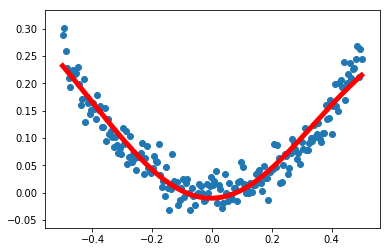

In [55]:
# train and prediction
training_times = 2000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(training_times):
        sess.run(train, feed_dict={x:x_data, y:y_data})
        
    prediction_value = sess.run(prediction, feed_dict={x:x_data})
    
    # draw pic
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value, 'r-', lw=5)
    plt.show()